<a href="https://colab.research.google.com/github/MosheHabaz/CustomersSegmentationAnalysis/blob/master/Customer_Analytics_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Marketing Analytics by customer information :
The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 

## ${\textbf{Libraries}}$

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sklearn used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## ${\textbf{Import Data}}$

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data, contained in the segmentation data csv file.
df_segmentation = pd.read_csv('/content/drive/My Drive/Colab Notebooks/marketing/segmentation data.csv', index_col = 0)

In [4]:
df_info_columns = pd.read_excel('/content/drive/My Drive/Colab Notebooks/marketing/segmentation data legend.xlsx', index_col = 0)

## ${\textbf{Explore Data}}$

In [5]:
pd.set_option('display.max_colwidth', -1)
df_info_columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Data type,Range,Description
Variable,,,
ID,numerical,Integer,Shows a unique identificator of a customer.
Sex,categorical,"{0,1}","Biological sex (gender) of a customer. In this dataset there are only 2 different options. 0: male , 1:female ."
Marital status,categorical,"{0,1}","Marital status of a customer. 0 -single, 1-non-single (divorced / separated / married / widowed)."
Age,numerical,18-76,"The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset"
Education,categorical,"{0,1,2,3}","Level of education of the customer. 0: other / unknown , 1:high school, 2:university, 3:graduate school"
Income,numerical,Real,Self-reported annual income in US dollars of the customer.
Occupation,categorical,"{0,1,2}","Category of occupation of the customer.0:unemployed / unskilled , 1:skilled employee / official, 2:management / self-employed / highly qualified employee / officer"
Settlement size,categorical,"{0,1,2}","The size of the city that the customer lives in. 0:small city, 1:mid-sized city, 2:big city"


In [6]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


The described method used to obtain descriptive statistics about the columns of a dataframe

In [7]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## ${\textbf{Correlation Estimate}}$

In [8]:
# Compute Pearson correlation coefficient for the features in our data set.
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


We'll plot the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.

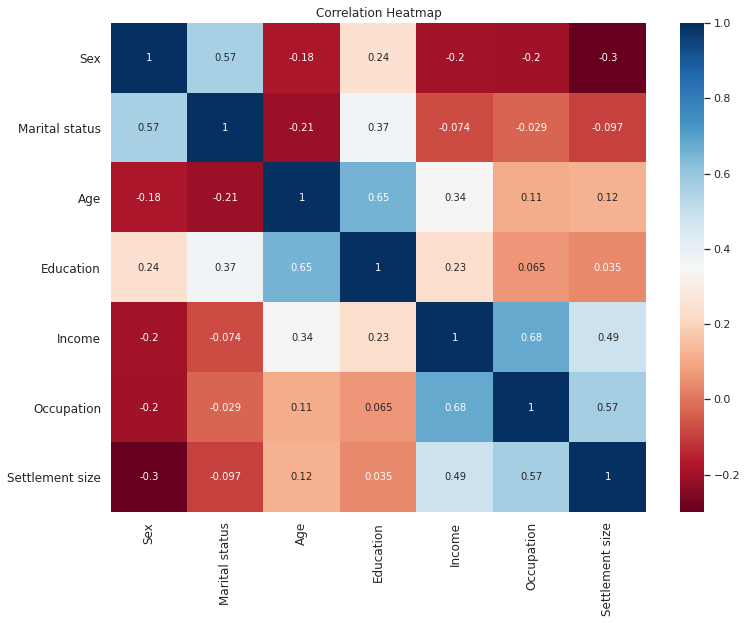

In [9]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(), annot = True,  cmap = 'RdBu'  )
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

**Income and occupation** - correlation is 0.68  In other words if you have a higher salary you are more likely to live in a larger housing.
There is another a strong positive correlation between **age and education** a value of 0.65 , It makes sense older people tend to be more highly educated.


## ${\textbf{Visualize Raw Data}}$

We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set. 


Text(0.5, 1.0, 'Visualization of raw data')

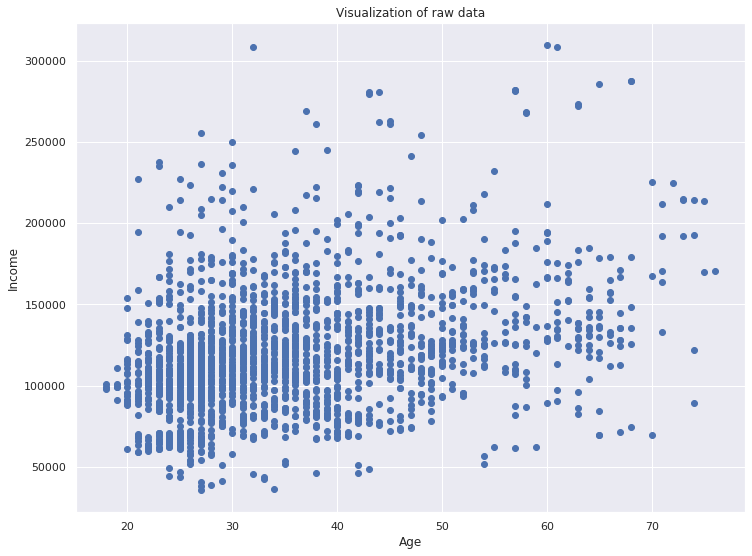

In [10]:
plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## ${\textbf{Standardization}}$

Standardizing data, so that all features have equal weight. This is important for modelling.
Otherwise, in our case Income would be considered much more important than Education for Instance. 
We do not know if this is the case, so we would not like to introduce it to our model. 
This is what is also refered to as bias.

In [11]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## ${\textbf{Hierarchical Clustering}}$

Perform Hierarchical Clustering. The results are returned as a linkage matrix.

In [12]:
 hier_clust = linkage(segmentation_std, method = 'ward')

We plot the results from the Hierarchical Clustering using a Dendrogram. 
We truncate the dendrogram for better readability. 
The level p shows only the last p merged clusters - This means will only see the last 5 merge.
We also omit showing the labels for each point.

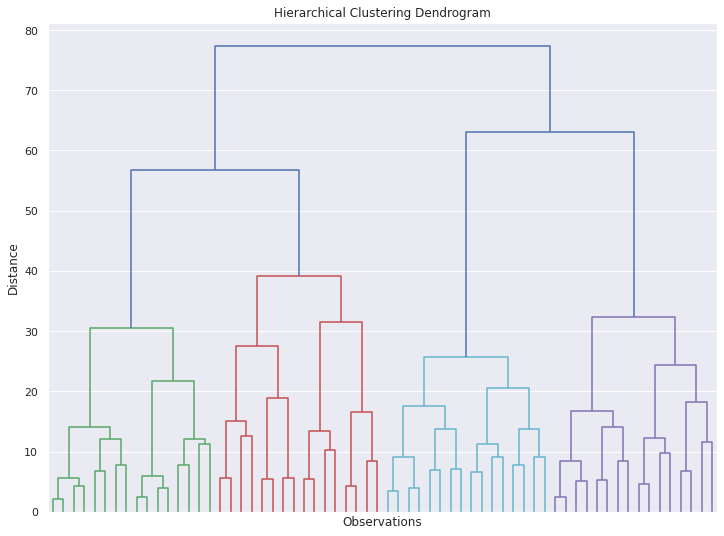

In [13]:

plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

We only have 2000 observations. However with bigger data sets a hierarchical clustering solution may take minutes or even hours to compute precisely because it is slow.
It isn't very practical but it has one major advantage over other methods.
It finds the number of clusters in the data in our case its 4.

## ${\textbf{K-means Clustering}}$

KMeans doesn't tell us how many clusters there are,instead it minimizes the Euclidean norm.

we run the algorithms say 10 different times with 10 different number of clusters.

We calculate the Within Cluster Sum of Squares (WCSS) for each of the clustering solutions.

The WCSS is the sum of the variance between the observations in each cluster it measures the distance between each observation and the centroid and calculates the squared difference between the two.

We'll use within cluster sum of squares values to determine the best clustering solution in 10 iterations.

In addition with k means++ we run the algortihm at many different starting points , and we set a random state for reproducibility.
k means++ is an algorithm that runs before the actual K Means and finds the best starting points for the centroid.

In [14]:
wcss = [] 
#in each iteration we add the value to the WCSS array.
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

Plot the Within Cluster Sum of Squares for the different number of clusters.
From this plot we choose the number of clusters. 


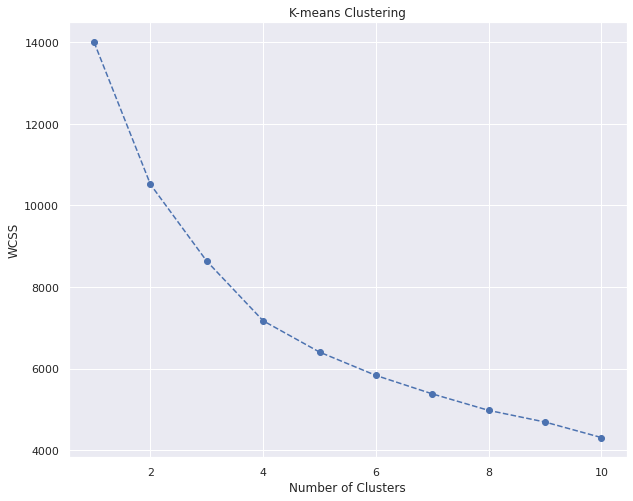

In [15]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

We make a decision about the number of clusters but how exactly do we choose how many clusters we want.
We'll use an approach known as **the elbow method**.
The goal is to spot the elbow itself and take that many clusters usually the part of the graph below the elbow would be steeply declining while the part after it much smoother.

The elbow in the graph is **4**. this is the only place until the graph is steeply declining while smoothing out afterwards.

This resulte corresponds to the result of hierarchical clustering which we obtained **4** clusters.

In [16]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [17]:
# We divide our data into the four clusters.
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### ${\textbf{Results}}$

In [19]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_
df_segm_kmeans['Segment K-means']

ID
100000001    0
100000002    3
100000003    1
100000004    2
100000005    2
            ..
100001996    1
100001997    3
100001998    1
100001999    3
100002000    1
Name: Segment K-means, Length: 2000, dtype: int32

With this information we will comprehend what the different clusters mean.
what the characteristics of the people in each of the clusters are.
To gain insight we will calculate the mean values of each features by clusters.

In [20]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695




---


interpret the 4 groups logically:

First segment (label 0) :
*   **Sex**- It is composed of men and women almost equally 
*   **Age**-  The average age of 56, Comparing this mean age with the other      clusters, we realize that this is the oldest segment.
*   **Material status** - Almost 70% are in relationships
*   **Education** - They have the highest level of education.
*   **Income**- This group have the highest income.

>We could call this segment ***The well-off*** people


Second segment (label 1):
*   **Sex**- 65% are male.
*   **Age**-  Their average age is 36 years.
*   **Material status** - Almost all are single
*   **Education** - Their education level is low on average compared to other segments in terms of salary and jobs.
*   **Income**- This segment has the lowest values under 100000 for annual salary.
*   **Settlement size**- They live almost exclusively in small cities.

>We could call this segment ***fewer opportunities***

third segment (label 2):
*   **Sex**- 15% are male.
*   **Age**- This is the youngest segment , their average age is 29 years.
*   **Material status** - Almost all are in relationship.
*   **Education** - They have a medium level of education.
*   **Income**- This segment has average income .
*   **Occupation** - middle management jobs.
*   **Settlement size**- They seem equally distributed between small mid-sized and big cities.

>So they seem average in just about every parameter - We can label the segment 
***standard***.


fourth segment (label 3):
*   **Sex**- It is comprised almost entirely of men.
*   **Age**- Their average age is 35 years.
*   **Material status** -Less than 20 percent of whom are in relationships.
*   **Education** - We observe relatively low values for education.
*   **Income**- high values for income .
*   **Occupation** - highest value of occupation.
*   **Settlement size**- The majority of this segment lives in big or middle sized cities.

>We can label the segment -***career focused.***.


---



---





Compute the size and proportions of the four clusters


In [21]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [22]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


we can see that there are 263 individuals or 13% of the entire data in the well off segment.

So this is the smallest segment the largest segment is the third one standard comprised of 35%

of all individuals.

In between we find being career focused and fewer opportunities containing 570 and 462 persons respectively.

In [23]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
career focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


Add the segment labels to our table

In [26]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well-off
100000002,1,1,22,1,150773,1,2,3,career focused
100000003,0,0,49,1,89210,0,0,1,fewer opportunities
100000004,0,0,45,1,171565,1,1,2,standard
100000005,0,0,53,1,149031,1,1,2,standard


Plotting the results from the K-means algorithm:

we use our original df_segmentation_KMeans and plot each individual point and its corresponding cluster .


Each point in our data set is plotted with the color of the clusters it has been assigned to.

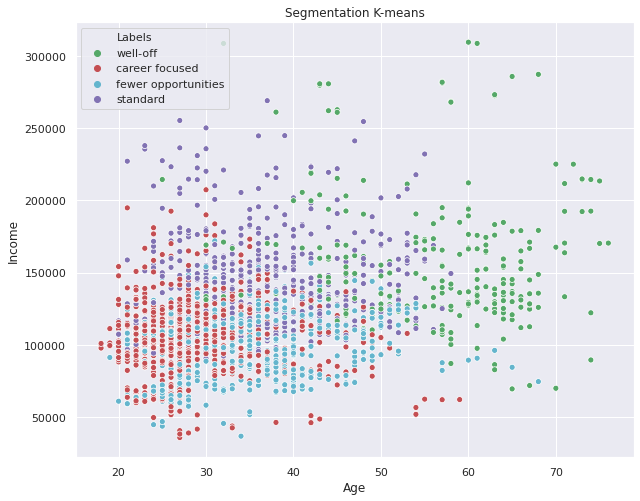

In [27]:

x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

We can see the green segment **well-off** is clearly separated as it is highest in both age and income.

Unfortunately the other 3 are grouped together so it's harder to get more insight just by looking at the plot.
we can conclude that K Means did a decent job at separating our data into clusters.

However the result is far from perfect.



---



---


### ${\textbf{PCA}}$

Apply dimensionality reduction to simplify our problem.

In [28]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [29]:
# Fit PCA with our standardized data.
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA essentially creates as many components as there are features in our data.
In our case 7.

Moreover these components are arranged in order of importance, importance here indicates how much of the variance of our data is explained by each component.

We can call the explained variance ratio attribute to actually check what 
happened.



In [30]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

We can see that there are 7 components in essence PCA applied a linear transformation on our data which created 7 new variables.

Now some of them contain a large proportion of the variance while others almost none.

Together these seven components explain 100% of the variability of the data.

That's why if you sum up all the numbers you see you'll get 1.

We observe that the first component explains around 36% of the variability of the data, The second one 26%, The third 19% and so on, and the last component explains only 2% of the information.

we will select a subset of components while preserving as much information as possible logically.

We want to include the most prominent components.

Therefore if we want to choose two components we would choose the first two as they contain most of the variance. If we opt for 3 we would take the first 3 and so on.



Line chart which shows the cumulative explained variance against the number of components chosen.

Text(0, 0.5, 'Cumulative Explained Variance')

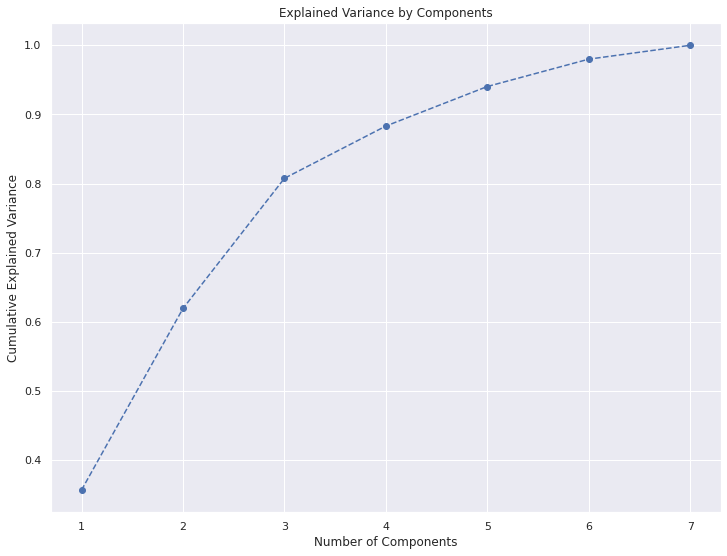

In [31]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Now we can see the explained variance by number of components.

It will help us decide how many components to keep in our dimensionality reduction.
If we choose 2 components we can see that we preserve around 60% of the information, if we choose 3 components around 80%, with 4 of them will keep almost 90% of the initial variability.

A rule of thumb is to keep at least 70% to 80% of the explained variance as mentioned if we take all seven we would have 100 percent of the information but we wouldn't reduce the dimensionality of the problem at all.

In this case keeping 3 components makes sense, both of them would reduce our features significantly while preserving most of the information.

In [32]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [33]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### ${\textbf{PCA with 3 components Results}}$

Here we discucss the results from the PCA.
The components attribute shows the loadings of each component on each of the seven original features.

The loadings are the correlations between the components and the original features. 

In [34]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

The result is a 3 by 7 array, we reduced our features to three components from the original 7 and that explains the shape.

In [35]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


Notice that all values are between negative 1 and 1 as they are essentially correlations.
This means the closer a result is to 0 the lower the loading of a variable onto a component.

([<matplotlib.axis.YTick at 0x7f936a014a20>,
 [Text(0, 0.5, 'Component 1'),
  Text(0, 1.5, 'Component 2'),
  Text(0, 2.5, 'Component 3')])

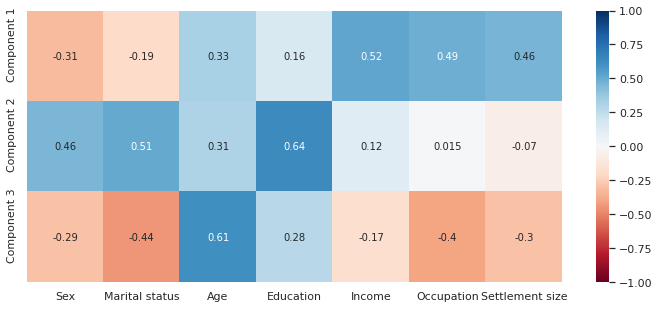

In [44]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize = (12,5))
sns.heatmap(df_pca_comp,vmin = -1, vmax = 1,cmap = 'RdBu',annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'])



*   **component1** : There is a positive correlation between **component1** and **Age**, **Income**, **Occupation** and **Settlement size**.
As you can guess these all relate strictly to the career of a person, So this component shows the ***Career focus*** of the individual.


*   **component2**: It seems to be quite different,**Sex**, **marital status** and **education** are by far the most prominent determinants. You can also see that all career related features are almost uncorrelated with it.
Therefore this component doesn't refer to the career but rather to an **individual's education and lifestyle**.

*   **component3**: Regarding the final component we realize that **age**, **marital status** and **occupation** are the most important determinants here.
We observed that **marital status** and **occupation** load negatively but are still important. So the 3 important aspects of the 3 component indicate the **experienced person has** no matter if work experience or life experience.



The original data refers to the original 7 features, therefore it is seven dimensional.

We must transform it into 3 dimensional,and the PCA class has a built in method that transforms our data in the desired way.

In [45]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [47]:
scores_pca = pca.transform(segmentation_std)


array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

The result is a new array where each observation is described by the three components.
That's why there are only 3 columns one for each of the new features these new values we obtained are called PCA scores. There is no need to use the original dataframe because the PCA is his replacement with the dimensionality reduction .

### ${\textbf{K-means clustering with PCA}}$

In [49]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Now let's visualize the within clusters sum of squares by number of clusters.

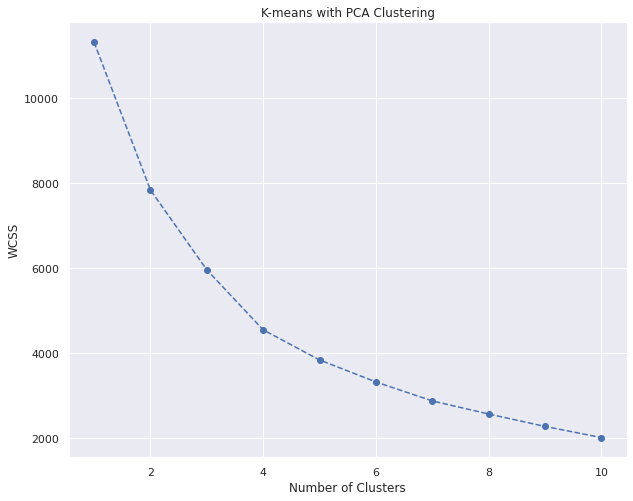

In [50]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

Again it looks like 4 is the best option.
We have chosen four clusters, so we run K-means with number of clusters equals four. 
Same initializer and random state as before.

In [51]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [52]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### ${\textbf{K-means clustering with PCA Results}}$

In [53]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [54]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [55]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


Interpreting the result:

We said the first component was related to **career**,the second to **education and lifestyle** while the third to their **life and or work experience**.

our previous four clusters were **standard**, **career focused**, **fewer opportunities** and **well-off**.


*   **well-off**: Segment 3 is highest on all three components,career education and lifestyle and experience, We can easily establish that this is the well-off.
*   **fewer opportunities** : Segment 2 on the other hand shows the lowest average PCA scores for a career in education and lifestyle but is high on experience. It seems that this is the fewer opportunities cluster.
*   **career focus** : segment 1 shows high values for career but low for education and lifestyle, and as someone independent from experience this sounds like our career focus segment.
*   **standard** : segment 0 it has low career and experience values while normal to high education and lifestyle values.This is our youngest cluster which we labeled standard in our previous analysis.



Calculate the size of each cluster and its proportion to the entire data set.

In [56]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
career focused,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
fewer opportunities,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
well-off,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


analyzing the results:
The largest segment with 692 or 34% individuals is the **standard** segment , it's followed by the **career focus** group with 583 people or 29% of the whole, next comes the **fewer opportunities** group with 460 people 23%,  followed by the smallest segment **well-off** it contains only 265 or 13% of the total number of individuals.



---



---



Plot data by PCA components:

we'll choose 2 of the components and use them as axis for the visualization.

The point of PCA was to determine the most important components so we can be absolutely sure that the first two components explain more variance than the third one.
So let's visualize the segments with respect to the first two components.

In [57]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

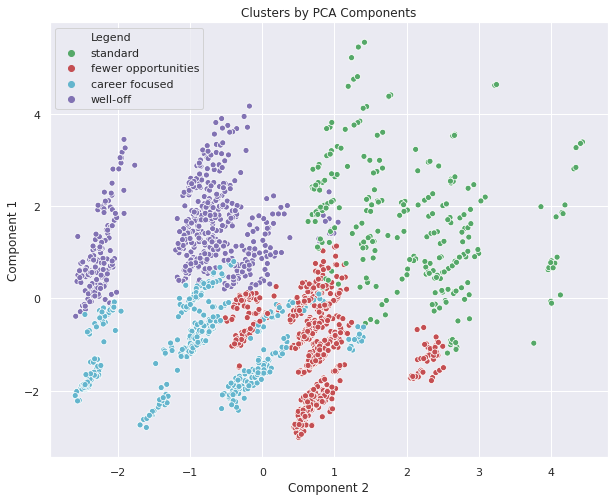

In [58]:
# The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

We can now observe the separate clusters we can clearly see that the green segment is the **well-off** segment the purple segment is career focused.

While the red and blue represent the **standard** and **fewer opportunities** segments respectively.

The division based on the components is much more pronounced.

### ${\textbf{Data Export}}$

In [59]:
# We need the scaler, pca and kmeans_pca objects to preprocess and segment the purchase data set.
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [60]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [61]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))